# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDb is an online database of information related to films, television programs, and streaming content online including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.This data set contains information about 10,000 movies including user ratings and revenue and few other attributes which aims to find some useful trends and answer below questions.

#### Questions

<ul>
<li>Top Genres on which movies are produced till date.</li>
<li>List of top 10 Blockbuster movies and other properties associated with them.</li>
<li>Trend of movie releases.</li>
</ul>


<a id='wrangling'></a>
## Data Wrangling


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)# To avoid exponetial values 
%matplotlib inline

In [2]:
#Read dataset
df=pd.read_csv('tmdb-movies.csv')
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610       32.99  150000000  1513528810      Jurassic World   
1   76341  tt1392190       28.42  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446       13.11  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year   budget_adj   revenue_adj  
0          6.50          2015 137999939.28 1392445892.52  
1          7.10          2015 137999939.28  348161292.49  
2          6.30          2015 101199955.47  271619025.41  

[3 rows x 21 columns]

In [3]:
#To get list of count of rows and columns in dataset
df.shape

(10866, 21)

##### Dataset contains 10866 rows and 21 columns

In [12]:
#To get some more information related to database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### Not all columns are required from above. However to be more focued on our objective we would be more focused on popularity,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj, columns.Hence in next step we drop them and then lets analyse their data quality later.

In [4]:
#Keeping only required columns
main=df.drop(['imdb_id','budget','revenue','cast','homepage','keywords','tagline','production_companies','overview','vote_count','vote_average'],axis=1)
main.columns

Index(['id', 'popularity', 'original_title', 'director', 'runtime', 'genres',
       'release_date', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

##### We would need a column for profit or revenue generated by movies

In [5]:
#Adding a new column
main['profit']=main.revenue_adj-main.budget_adj
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   director        10822 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   release_year    10866 non-null  int64  
 8   budget_adj      10866 non-null  float64
 9   revenue_adj     10866 non-null  float64
 10  profit          10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


##### Here we notice that we might have missing values in few columns and data type for date time columns can be corrected.

In [6]:
#Coverting release date column to date time format
main['release_date'] = pd.to_datetime(main['release_date'])
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   original_title  10866 non-null  object        
 3   director        10822 non-null  object        
 4   runtime         10866 non-null  int64         
 5   genres          10843 non-null  object        
 6   release_date    10866 non-null  datetime64[ns]
 7   release_year    10866 non-null  int64         
 8   budget_adj      10866 non-null  float64       
 9   revenue_adj     10866 non-null  float64       
 10  profit          10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 933.9+ KB


In [7]:
#Check for missing values
main.isnull().sum()

id                 0
popularity         0
original_title     0
director          44
runtime            0
genres            23
release_date       0
release_year       0
budget_adj         0
revenue_adj        0
profit             0
dtype: int64

##### We need director and genres column with correct values , hence we drop missing value rows from the dataset.

In [8]:
#drop missing values and check 
main.dropna(inplace=True)
main.isnull().sum()

id                0
popularity        0
original_title    0
director          0
runtime           0
genres            0
release_date      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
dtype: int64

In [53]:
#Check for exact duplicate rows
sum(main.duplicated())

1

In [55]:
#drop the duplciate row
main.drop_duplicates(inplace=True)

#check again
sum(main.duplicated())

0

##### Now lets check descriptive stats of dataset

In [11]:
main.describe()

id  popularity  runtime  release_year   budget_adj   revenue_adj  \
count  10801.00    10801.00 10801.00      10801.00     10801.00      10801.00   
mean   65574.02        0.65   102.19       2001.29  17655514.82   51672440.56   
std    91752.11        1.00    30.78         12.82  34382645.08  145012328.29   
min        5.00        0.00     0.00       1960.00         0.00          0.00   
25%    10571.00        0.21    90.00       1995.00         0.00          0.00   
50%    20465.00        0.39    99.00       2006.00         0.00          0.00   
75%    74725.00        0.72   111.00       2011.00  21033371.65   34084779.31   
max   417859.00       32.99   900.00       2015.00 425000000.00 2827123750.41   

             profit  
count      10801.00  
mean    34016925.74  
std    125563687.99  
min   -413912431.00  
25%            0.00  
50%            0.00  
75%     13384699.52  
max   2750136650.92

##### Intrestingly , budget/revenue column seems to have min value as 0 which does not seems correct. Min runtime is also 0 , however we ignore runtime as if now.

In [12]:
#To check rows which have budget/revenue as 0
main.query('budget_adj==0').shape[0],main.query('revenue_adj==0').shape[0]

(5636, 5952)

##### This seems to be huge count as compared with total volume, hence in real life we would ask the source system to fix this , else other simple option is to replace them with mean of that year. However we will drop them as if now , as it may lead is incorrect trends when we check profit related KPIs.

In [13]:
#Drop rows based on index where we have Budget and Revenue as 0
main.drop(main.loc[main['budget_adj']==0].index, inplace=True)
main.drop(main.loc[main['revenue_adj']==0].index, inplace=True)

In [14]:
#Check 
main.describe()

id  popularity  runtime  release_year   budget_adj   revenue_adj  \
count   3854.00     3854.00  3854.00       3854.00      3854.00       3854.00   
mean   39895.12        1.19   109.20       2001.26  44246678.74  137062050.54   
std    67221.39        1.48    19.91         11.28  44805205.43  216112952.11   
min        5.00        0.00    15.00       1960.00         0.97          2.37   
25%     6073.50        0.46    95.00       1995.00  13090528.47   18357350.36   
50%    11321.50        0.80   105.50       2004.00  30016111.91   61730679.08   
75%    38578.00        1.37   119.00       2010.00  60613069.68  163257654.56   
max   417859.00       32.99   338.00       2015.00 425000000.00 2827123750.41   

             profit  
count       3854.00  
mean    92815371.79  
std    194076452.70  
min   -413912431.00  
25%     -1507958.43  
50%     27370641.16  
75%    107454751.41  
max   2750136650.92

##### Our Dataset is finally cleaned and ready to use for EDA

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Top Genres on which movies are produced till date.

In [40]:
#Genres column issues
df_profit['genres'].head()

1329             Adventure|Action|Science Fiction
1386     Action|Adventure|Fantasy|Science Fiction
5231                       Drama|Romance|Thriller
10594                       Drama|Horror|Thriller
9806                    Horror|Thriller|Adventure
Name: genres, dtype: object

##### We need to split keywords , get a list of all of them and then make count of each unique keyword

In [22]:
#Create a string object with all keywords 
tmp = main['genres'].str.cat(sep = '|')

In [24]:
# Get a list of all keywords and then later we count each unique value 
data= pd.Series(tmp.split('|'))
data=data.value_counts().head(10)#Only top 10 Genres 
data

Drama              1756
Comedy             1357
Thriller           1205
Action             1086
Adventure           749
Romance             666
Crime               652
Science Fiction     520
Horror              463
Family              425
dtype: int64

Text(0.5, 1.0, 'Genres on which movies are produced till date')

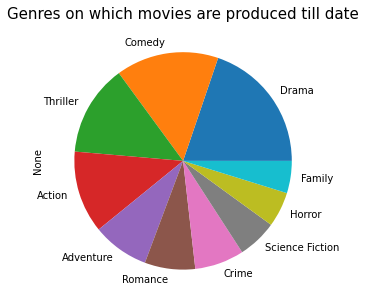

In [27]:
#Graphical Pie Chart 
data.sort_values(ascending=False).plot(kind='pie',figsize = (10,5))
plt.title("Genres on which movies are produced till date",fontsize=15)

##### As above Drama, Comedy , Thriller and Action movies are produced mostly till date.

### Research Question 2 : List of Top 10 Blockbuster movies and other properties associated with them.

In [28]:
#Get top 10 Blockbuster movies with most profit
df_profit=pd.DataFrame(main.sort_values(by=['profit'],ascending=False)).head(10)
df_profit

id  popularity                  original_title  \
1329       11       12.04                       Star Wars   
1386    19995        9.43                          Avatar   
5231      597        4.36                         Titanic   
10594    9552        2.01                    The Exorcist   
9806      578        2.56                            Jaws   
8889      601        2.90      E.T. the Extra-Terrestrial   
3      140607       11.17    Star Wars: The Force Awakens   
8094     1642        1.14                         The Net   
10110   12230        2.63  One Hundred and One Dalmatians   
7309     1891        5.49         The Empire Strikes Back   

                                                director  runtime  \
1329                                        George Lucas      121   
1386                                       James Cameron      162   
5231                                       James Cameron      194   
10594                                   William Friedkin      122   
9806                                    Steven Spielberg      124   
8889                                    Steven Spielberg      115   
3                                            J.J. Abrams      136   
8094                                       Irwin Winkler      114   
10110  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman       79   
7309                                      Irvin Kershner      124   

                                         genres release_date  release_year  \
1329           Adventure|Action|Science Fiction   1977-03-20          1977   
1386   Action|Adventure|Fantasy|Science Fiction   2009-12-10          2009   
5231                     Drama|Romance|Thriller   1997-11-18          1997   
10594                     Drama|Horror|Thriller   1973-12-26          1973   
9806                  Horror|Thriller|Adventure   1975-06-18          1975   
8889   Science Fiction|Adventure|Family|Fantasy   1982-04-03          1982   
3      Action|Adventure|Science Fiction|Fantasy   2015-12-15          2015   
8094        Crime|Drama|Mystery|Thriller|Action   1995-07-28          1995   
10110         Adventure|Animation|Comedy|Family   2061-01-25          1961   
7309           Adventure|Action|Science Fiction   1980-01-01          1980   

        budget_adj   revenue_adj        profit  
1329   39575591.36 2789712242.28 2750136650.92  
1386  240886902.89 2827123750.41 2586236847.52  
5231  271692064.21 2506405735.42 2234713671.21  
10594  39289276.63 2167324901.20 2128035624.57  
9806   28362748.20 1907005841.92 1878643093.71  
8889   23726245.23 1791694309.25 1767968064.02  
3     183999919.04 1902723129.80 1718723210.76  
8094   31481271.08 1583049536.35 1551568265.28  
10110  29179444.83 1574814739.70 1545635294.87  
7309   47628661.55 1424626187.77 1376997526.22

Text(0, 0.5, 'Movies')

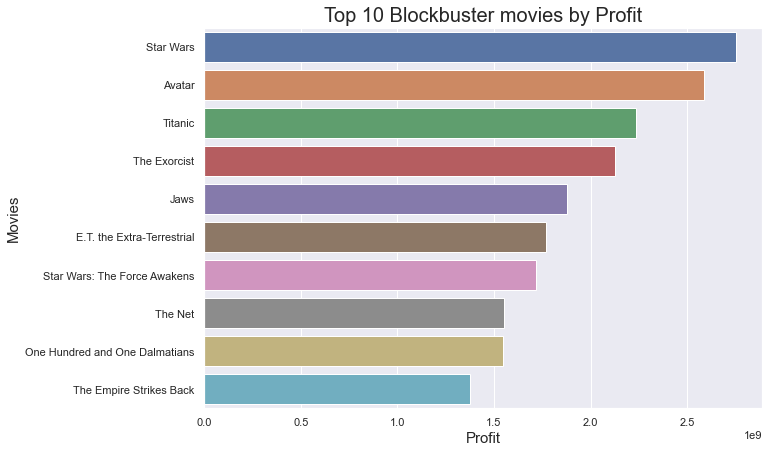

In [33]:
# Barchat plotting
figure = sns.barplot(x=df_profit.profit,y=df_profit.original_title,)
sns.set(rc={'figure.figsize':(10,7)})
figure.set_title("Top 10 Blockbuster movies by Profit",fontsize = 20)
figure.set_xlabel("Profit",fontsize = 15)
figure.set_ylabel("Movies",fontsize = 15)

##### Yes we all loved above movies worldwide and hence Star Wars, Avatar and Titanic are seen rulling the chart.

##### Below are some other properties associated with above movies:

In [37]:
#Most common genres of top profitable movies

#Some cleaning on genres column again
tmp = df_profit['genres'].str.cat(sep = '|')
data= pd.Series(tmp.split('|'))

#Get the count of unique keywords 
data=data.value_counts()
data

Adventure          7
Action             5
Science Fiction    5
Thriller           4
Fantasy            3
Drama              3
Horror             2
Family             2
Mystery            1
Crime              1
Romance            1
Comedy             1
Animation          1
dtype: int64

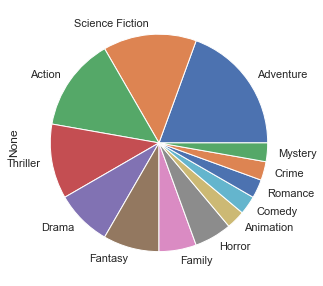

In [38]:
# Visualising above values in Pie chart
data.sort_values(ascending=False).plot(kind='pie',figsize = (10,5))

##### Unlike most genres created till now , Blockbuster movies seems to have Adventure , Science Fiction , Action and Thirller rulling the chart and seems to earning more.

In [42]:
# Directors who delivered maximum profitable movies

#Issue in Director column, which needs to be cleaned like Genres
df_profit['director']

1329                                          George Lucas
1386                                         James Cameron
5231                                         James Cameron
10594                                     William Friedkin
9806                                      Steven Spielberg
8889                                      Steven Spielberg
3                                              J.J. Abrams
8094                                         Irwin Winkler
10110    Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman
7309                                        Irvin Kershner
Name: director, dtype: object

In [43]:
#Cleaning of Director Column like Genres
tmp = df_profit['director'].str.cat(sep = '|')
data= pd.Series(tmp.split('|'))
data=data.value_counts()
data

James Cameron          2
Steven Spielberg       2
Wolfgang Reitherman    1
George Lucas           1
Irwin Winkler          1
Hamilton Luske         1
J.J. Abrams            1
Clyde Geronimi         1
Irvin Kershner         1
William Friedkin       1
dtype: int64

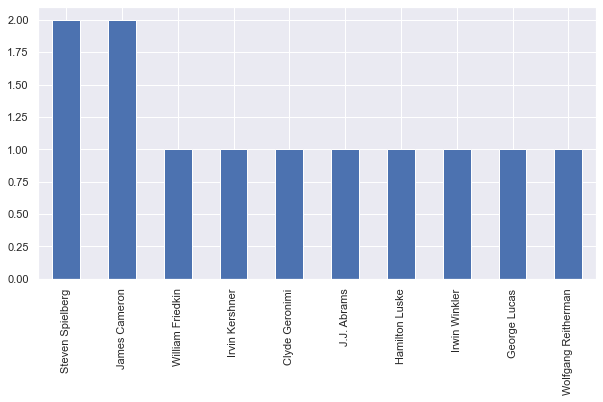

In [45]:
#Graphical representation of above
data.sort_values(ascending=False).plot(kind='bar',figsize = (10,5))

##### This analysis shows that creating movies with above directors increases chances of movie being a Blockbuster.

### Research Question 3 : Trend of movie releases.

In [58]:
#Lets get count of movies by each year
tmp=main.groupby('release_year').count()['original_title']

Text(0, 0.5, 'Count of Movies')

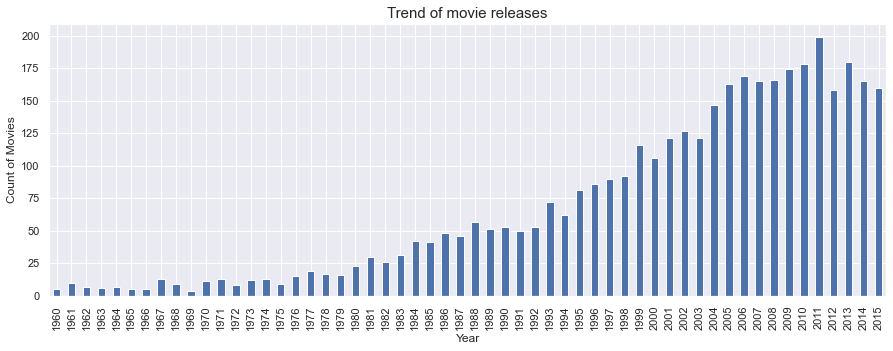

In [59]:
#Plotting above
tmp.plot(kind='bar',figsize = (15,5));
plt.title("Trend of movie releases",fontsize=15)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Count of Movies",fontsize=12)

##### Year 2011,2010 and 2013 seems to have created most number of movies.

<a id='conclusions'></a>
## Conclusions

Let us conclude our finding question wise as below:

<ul>
<li><b>Top Genres on which movies are produced till date.</b>
<p> More than 50 % of movies created till now have genres as Drama, Comedy , Thriller and Action movies till date. </p>     
</li>
<br>    
<li><b>List of top Blockbuster movies and other properties associated with them.</b>
<p> Star Wars, Avatar and Titanic are among top 3 to rule the chart. Unlike above genres they have Adventure , Science Fiction , Action and Thirller trending and have directors James Cameron, Steven Spielberg associated.</p>    
</li>
<br>    
<li><b>Trend of movie releases.</b>
<p>Among all history years, 2011,2010 and 2013 seems to have created most number of movies  </p>    
</li>
</ul>